<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

                XGBoost 작동법 이해
                XGBoost 기본 예제 사용
                XGBoost 하이퍼파라미터
                XGBoost와 앙상블

        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
X, y = load_diabetes(return_X_y=True)

In [ ]:
X.shape, y.shape

((442, 10), (442,))

In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from xgboost import XGBRegressor

In [ ]:
xgbreg = XGBRegressor(booster='gbtree', objective='reg:squarederror', max_depth=6, learning_rate=0.1,
                      n_estimators=100, n_jobs=-1)

In [ ]:
scores = cross_val_score(xgbreg, X, y, scoring='neg_mean_squared_error', cv=5)

In [ ]:
rmse = np.sqrt(-scores)

In [ ]:
rmse

array([59.39695422, 60.32242737, 69.0363495 , 63.21144652, 66.9525213 ])

In [ ]:
rmse.mean()

63.78393977997189

In [ ]:
pd.DataFrame(y).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2) #shuffle = True

In [ ]:
def regression_model(model, kfold):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
    rmse = (-scores)**0.5
    return rmse.mean()

In [ ]:
regression_model(xgbreg, kfold)

63.11664219205941

In [ ]:
regression_model(XGBRegressor(booster='gblinear'), kfold)

55.47739281401763

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
regression_model(LinearRegression(), kfold)

55.50936875436023

In [ ]:
regression_model(Lasso(), kfold)

62.64904114426351

In [ ]:
regression_model(Ridge(), kfold)

58.835292374356676

In [ ]:
regression_model(XGBRegressor(booster='gbtree'), kfold)

66.8205077933539

#외계행성 데이터

In [ ]:
ls ./drive/MyDrive/data/exo*

./drive/MyDrive/data/exoplanets.csv.zip


LABEL : 외계행성이면 2, 아니면 1

row : 행성 한개에 대한 정보

column : 시간에 따른 별 밝기의 변화

In [ ]:
cp ./drive/MyDrive/data/exoplanets.csv.zip ./

In [ ]:
!unzip exoplanets.csv.zip

Archive:  exoplanets.csv.zip
  inflating: exoplanets.csv          


In [ ]:
df = pd.read_csv('exoplanets.csv')

In [ ]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

GradientBoostingClassifier

XGBClassifier

n_estimators, max_depth

In [ ]:
ls -alh

total 300M
drwxr-xr-x 1 root root 4.0K Oct 17 00:50 ./
drwxr-xr-x 1 root root 4.0K Oct 16 23:34 ../
drwxr-xr-x 4 root root 4.0K Oct 13 13:21 .config/
drwx------ 5 root root 4.0K Oct 17 00:43 drive/
-rwxr-xr-x 1 root root 251M Sep 20  2019 exoplanets.csv*
-rw------- 1 root root  50M Oct 17 00:49 exoplanets.csv.zip
drwxr-xr-x 1 root root 4.0K Oct 13 13:22 sample_data/


In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

y = y.replace(1, 0)
y = y.replace(2, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

xgb_c = XGBClassifier(n_estimators=100, max_depth=3, random_state=156)
xgb_c.fit(X_train, y_train)
xgb_c_pred = xgb_c.predict(X_test)
xgb_c_accuracy = accuracy_score(y_test, xgb_c_pred)
xgb_c_accuracy

0.9913522012578616

In [ ]:
ls -al

total 306696
drwxr-xr-x 1 root root      4096 Oct 17 00:50 ./
drwxr-xr-x 1 root root      4096 Oct 16 23:34 ../
drwxr-xr-x 4 root root      4096 Oct 13 13:21 .config/
drwx------ 5 root root      4096 Oct 17 00:43 drive/
-rwxr-xr-x 1 root root 262223348 Sep 20  2019 exoplanets.csv*
-rw------- 1 root root  51805279 Oct 17 00:49 exoplanets.csv.zip
drwxr-xr-x 1 root root      4096 Oct 13 13:22 sample_data/


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=156)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
accuracy_score(y_test, pred)

0.9905660377358491

    1    0.992727
    2    0.007273
    Name: LABEL, dtype: float64

In [ ]:
df.head(40)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [ ]:
df = pd.read_csv('exoplanets.csv', nrows=400)

In [ ]:
df.tail()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
395,1,40.56,49.38,4.21,8.59,59.32,8.53,-15.54,-2.38,12.36,...,-14.85,-1.71,-3.24,-3.60,-11.46,-6.24,22.72,32.79,15.38,16.58
396,1,-156.16,-260.34,-273.28,-306.91,-260.66,-167.38,-117.38,-62.19,-110.16,...,154.78,58.84,-46.91,-134.47,-14.28,130.78,162.66,209.81,175.81,139.69
397,1,-380.68,-209.87,64.38,332.13,300.19,-96.24,-15.24,144.13,342.13,...,412.07,600.44,604.07,392.19,161.63,-24.00,461.57,200.82,154.76,134.63
398,1,22.70,30.34,26.82,10.58,4.23,-4.77,-6.71,8.84,5.44,...,67.33,85.22,80.53,119.54,118.37,133.08,87.32,89.88,116.77,90.83
399,1,-281.32,-269.50,-286.85,-278.34,-292.95,-298.18,-276.75,-263.15,-251.53,...,-13.41,5.94,-19.03,1.70,17.56,-1.43,-44.65,-26.03,-27.11,-10.23


In [ ]:
df.LABEL.value_counts()

1    363
2     37
Name: LABEL, dtype: int64

In [ ]:
X= df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
def light_plot(idx):
    y_vals = X.iloc[idx]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15, 8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.plot(x_vals, y_vals)
    plt.show()

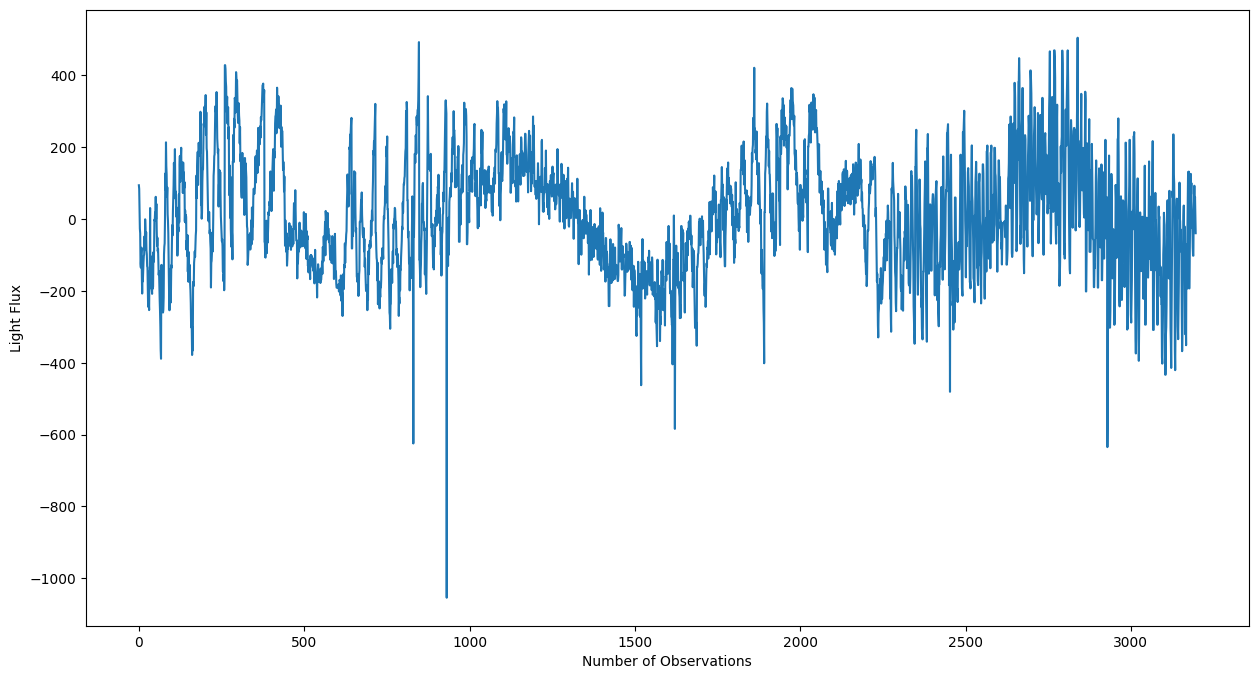

In [ ]:
light_plot(0)

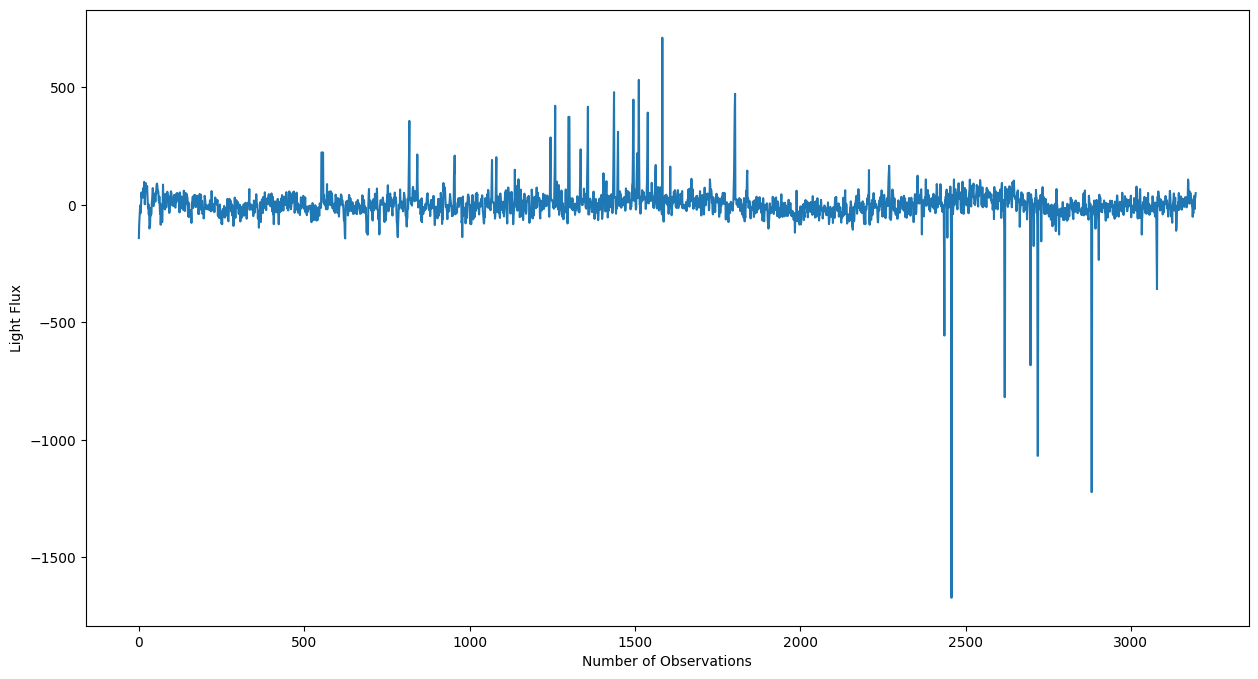

In [ ]:
light_plot(37)

In [ ]:
y[37]

1

In [ ]:
y[0]

2

In [ ]:
y = y.replace(1, 0)
y = y.replace(2, 1)

In [ ]:
y.value_counts()

0    363
1     37
Name: LABEL, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
model = XGBClassifier(booster='gbtree')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.89

89%

In [ ]:
37/400

0.0925

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 9,  3]])

86 : TN  

2 : FP

9 : FN

3 : TP

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100



In [ ]:
(0.91+0.60)/2

0.755

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test, y_pred)

0.25

In [ ]:
def xgb_clf(model, nrows):
    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    X = df.iloc[:, 1:]
    y = df.iloc[:, 0]
    y = y.replace(1, 0)
    y = y.replace(2, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return score

In [ ]:
xgb_clf(XGBClassifier(), nrows=800)

[[190   0]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       190
           1       1.00      0.10      0.18        10

    accuracy                           0.95       200
   macro avg       0.98      0.55      0.58       200
weighted avg       0.96      0.95      0.94       200



0.1

In [ ]:
xgb_clf(XGBClassifier(), nrows=200)

[[37  0]
 [ 9  4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       1.00      0.31      0.47        13

    accuracy                           0.82        50
   macro avg       0.90      0.65      0.68        50
weighted avg       0.86      0.82      0.78        50



0.3076923076923077

In [ ]:
xgb_clf(XGBClassifier(), nrows=74)

[[5 3]
 [3 8]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.73      0.73      0.73        11

    accuracy                           0.68        19
   macro avg       0.68      0.68      0.68        19
weighted avg       0.68      0.68      0.68        19



0.7272727272727273

#오버샘플링

nrows=400

양성 = 37

1. 10배의 양성 개수인 df 만들기

2. df 와 원본데이터 합쳐서 1:1 비율 만들기

In [ ]:
X.shape, y.shape

((400, 3197), (400,))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 3197), (100, 3197), (300,), (100,))

In [ ]:
X_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
276,-194.14,-250.59,-161.44,-230.42,-230.46,-279.21,-278.62,-288.38,-227.54,-237.01,...,353.47,501.54,514.56,534.57,445.50,282.68,-380.10,-189.88,-169.53,-80.21
251,26.88,41.02,31.55,28.96,33.95,32.26,25.84,31.80,35.55,36.44,...,11.78,12.83,-1.33,-2.46,13.09,1.58,13.43,5.45,9.45,5.95
29,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,-24.00,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
109,78.41,76.41,43.45,55.38,82.47,105.28,111.80,84.39,85.71,111.12,...,-25.41,12.47,21.78,48.51,74.91,29.16,-22.85,-40.72,-23.25,-22.01
244,7.60,-1.37,2.50,8.73,-1.77,1.20,2.71,-2.91,0.60,-5.69,...,-10.45,-15.48,-17.36,-14.51,-15.88,-10.38,-11.14,-9.02,10.68,-7.77


In [ ]:
y_train.head()

276    0
251    0
29     1
109    0
244    0
Name: LABEL, dtype: int64

In [ ]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [ ]:
df_train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
276,0,-194.14,-250.59,-161.44,-230.42,-230.46,-279.21,-278.62,-288.38,-227.54,...,353.47,501.54,514.56,534.57,445.50,282.68,-380.10,-189.88,-169.53,-80.21
251,0,26.88,41.02,31.55,28.96,33.95,32.26,25.84,31.80,35.55,...,11.78,12.83,-1.33,-2.46,13.09,1.58,13.43,5.45,9.45,5.95
29,1,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
109,0,78.41,76.41,43.45,55.38,82.47,105.28,111.80,84.39,85.71,...,-25.41,12.47,21.78,48.51,74.91,29.16,-22.85,-40.72,-23.25,-22.01
244,0,7.60,-1.37,2.50,8.73,-1.77,1.20,2.71,-2.91,0.60,...,-10.45,-15.48,-17.36,-14.51,-15.88,-10.38,-11.14,-9.02,10.68,-7.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0,562.15,577.56,575.84,584.62,567.63,578.01,583.48,544.18,534.32,...,20.72,24.35,34.55,16.86,38.49,38.89,84.92,73.24,61.55,92.28
22,1,-48.48,-22.95,11.15,-70.04,-120.34,-150.04,-309.38,-160.73,-201.41,...,90.70,-20.01,-62.12,-45.96,-52.40,-4.93,26.74,21.43,145.30,197.20
72,0,101.61,83.99,100.06,90.88,56.35,30.60,52.66,38.55,42.56,...,-42.22,-40.28,-36.20,-59.89,-61.78,-38.67,-3.53,1.00,0.19,-317.47
15,1,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59


np.repeat 사용법 예제

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.repeat(arr, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6])

In [ ]:
np.repeat(arr, 10, axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [ ]:
np.repeat(arr, 3, axis=1)

array([[1, 1, 1, 2, 2, 2, 3, 3, 3],
       [4, 4, 4, 5, 5, 5, 6, 6, 6]])

In [ ]:
df_train[df_train['LABEL']==1]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
29,1,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
35,1,22.82,46.37,39.61,98.75,81.32,100.43,65.00,38.86,22.11,...,55.50,-16.22,-5.21,15.04,11.86,-5.38,-24.46,-55.86,-44.55,-16.80
10,1,118.81,110.97,79.53,114.25,48.78,3.12,-4.09,66.20,-26.02,...,50.05,50.05,50.05,67.42,-56.78,126.14,200.36,432.95,721.81,938.08
11,1,-239.88,-164.28,-180.91,-225.69,-90.66,-130.66,-149.75,-120.50,-157.00,...,-364.75,-364.75,-364.75,-196.38,-165.81,-215.94,-293.25,-214.34,-154.84,-151.41
23,1,145.84,137.82,96.99,17.09,-73.79,-157.79,-267.71,-365.91,-385.07,...,62.76,101.24,98.13,112.51,95.77,127.98,67.51,91.24,40.40,-10.80
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
6,1,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
14,1,-267.21,-239.11,-233.15,-211.84,-191.56,-181.69,-164.77,-156.68,-139.23,...,-754.92,-752.38,-752.38,-754.93,-761.64,-746.83,-765.22,-757.05,-763.26,-769.39
18,1,-66.47,-15.50,-44.59,-49.03,-70.16,-85.53,-52.06,-73.41,-59.69,...,-6.19,10.00,10.00,50.12,-14.97,-32.75,-30.28,-9.28,-31.53,26.88


In [ ]:
df_train[df_train['LABEL']==1].values

array([[ 1.0000e+00,  3.1290e+01,  2.5140e+01, ..., -1.7580e+01,
         1.3790e+01,  7.2000e-01],
       [ 1.0000e+00,  2.2820e+01,  4.6370e+01, ..., -5.5860e+01,
        -4.4550e+01, -1.6800e+01],
       [ 1.0000e+00,  1.1881e+02,  1.1097e+02, ...,  4.3295e+02,
         7.2181e+02,  9.3808e+02],
       ...,
       [ 1.0000e+00,  4.3070e+01,  4.6730e+01, ...,  1.8180e+01,
         5.1210e+01,  9.7100e+00],
       [ 1.0000e+00, -4.8480e+01, -2.2950e+01, ...,  2.1430e+01,
         1.4530e+02,  1.9720e+02],
       [ 1.0000e+00,  3.5920e+01,  4.5840e+01, ...,  3.7320e+01,
         3.6010e+01,  7.1590e+01]])

In [ ]:
new_df = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==1].values, 9, axis=0))

In [ ]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,3188,3189,3190,3191,3192,3193,3194,3195,3196,3197
0,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
1,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
2,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
3,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
4,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59
221,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59
222,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59
223,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59


In [ ]:
new_df.columns = df_train.columns

In [ ]:
new_df

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
1,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
2,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
3,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
4,1.0,31.29,25.14,36.93,16.63,17.01,-7.50,0.09,1.24,-19.82,...,11.36,12.96,28.50,51.05,25.85,4.79,13.26,-17.58,13.79,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59
221,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59
222,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59
223,1.0,35.92,45.84,47.99,74.58,87.97,87.97,105.23,131.70,130.00,...,39.71,-2.53,-2.53,15.32,18.65,20.43,22.40,37.32,36.01,71.59


In [ ]:
df_train_resample = pd.concat([df_train, new_df])

In [ ]:
df_train_resample.shape

(525, 3198)

In [ ]:
df_train_resample.LABEL.value_counts()

0.0    275
1.0    250
Name: LABEL, dtype: int64

In [ ]:
X_train_resample = df_train_resample.iloc[:, 1:]
y_train_resample = df_train_resample.iloc[:, 0]

In [ ]:
model = XGBClassifier()
model.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred)

In [ ]:
score

0.3333333333333333

#가중치 조정 : scale_pos_weight

양성 샘플의 가중치를 조정하기 위해 사용

In [ ]:
X

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,40.56,49.38,4.21,8.59,59.32,8.53,-15.54,-2.38,12.36,51.19,...,-14.85,-1.71,-3.24,-3.60,-11.46,-6.24,22.72,32.79,15.38,16.58
396,-156.16,-260.34,-273.28,-306.91,-260.66,-167.38,-117.38,-62.19,-110.16,-72.47,...,154.78,58.84,-46.91,-134.47,-14.28,130.78,162.66,209.81,175.81,139.69
397,-380.68,-209.87,64.38,332.13,300.19,-96.24,-15.24,144.13,342.13,206.76,...,412.07,600.44,604.07,392.19,161.63,-24.00,461.57,200.82,154.76,134.63
398,22.70,30.34,26.82,10.58,4.23,-4.77,-6.71,8.84,5.44,14.04,...,67.33,85.22,80.53,119.54,118.37,133.08,87.32,89.88,116.77,90.83


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: LABEL, Length: 400, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
model = XGBClassifier(scale_pos_weight = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred)
score

0.3333333333333333

# 하이퍼 파라미터 조정

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

1. 기준 모델

In [ ]:
X.shape, y.shape

((400, 3197), (400,))

In [ ]:
y.value_counts()

0    363
1     37
Name: LABEL, dtype: int64

In [ ]:
model = XGBClassifier(scale_pos_weight=10)
scores = cross_val_score(model, X, y, cv=2, scoring='recall')
scores

array([0.36842105, 0.33333333])

In [ ]:
scores.mean()

0.3508771929824561

In [ ]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

In [ ]:
model = XGBClassifier(scale_pos_weight=10)
scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')
print(scores)
scores.mean()

[0.21052632 0.22222222]


0.21637426900584794

In [ ]:
def grid_search(params, random=False, X=X, y=y, model=XGBClassifier(scale_pos_weight=10, random_state=2)):
    xgbc = model
    if random:
        grid = RandomizedSearchCV(xgbc, params, cv=kfold, n_jobs=-1, scoring='recall', random_state=2)
    else :
        grid = GridSearchCV(xgbc, params, cv=kfold, n_jobs=-1, scoring='recall')

    grid.fit(X, y)
    print(grid.best_params_)
    print(grid.best_score_)

In [ ]:
grid_search({'n_estimators':[50, 200, 400, 800]})

{'n_estimators': 50}
0.21637426900584794


In [ ]:
grid_search({'learning_rate':[0.01, 0.05, 0.2, 0.3]})

{'learning_rate': 0.01}
0.40350877192982454


In [ ]:
grid_search({'max_depth':[1, 2, 4, 8]})

{'max_depth': 2}
0.27046783625730997


In [ ]:
grid_search({'subsample':[0.3, 0.5, 0.7, 0.9]})

{'subsample': 0.3}
0.32456140350877194


In [ ]:
grid_search({'gamma':[0.05, 0.1, 0.5, 1]})

{'gamma': 1}
0.2982456140350877


In [ ]:
params = {'learning_rate':[0.001, 0.01, 0.03], 'max_depth':[1, 2, 3], 'gamma':[0.025, 0.5, 1]}

In [ ]:
grid_search(params=params)

{'gamma': 0.025, 'learning_rate': 0.001, 'max_depth': 2}
0.5628654970760234


In [ ]:
5050/37

136.48648648648648

#하이퍼파라미터 다루기

In [ ]:
ls ./drive/MyDrive/data/he*.csv

./drive/MyDrive/data/heart_disease.csv


In [ ]:
df = pd.read_csv('./drive/MyDrive/data/heart_disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


심장병 진단 데이터

1 : 심장병 있음

0 : 없음

1. 기준 점수 구하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
X= df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
model = XGBClassifier()

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print(np.round(scores, 4))
scores.mean()

[0.8197 0.8033 0.7705 0.7833 0.7667]


0.7886885245901639

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
scores = cross_val_score(model, X, y, cv=kfold)
print(np.round(scores, 4))
scores.mean()

[0.7213 0.7705 0.7541 0.85   0.8667]


0.7925136612021858

In [ ]:
def grid_search(params,random=False,X=X,y=y,model = XGBClassifier()):
    xgbc = model
    if random:
        grid = RandomizedSearchCV(xgbc,params,cv=kfold,n_jobs=-1,scoring='accuracy',random_state=2)
    else:
        grid = GridSearchCV(xgbc,params,cv=kfold,n_jobs=-1,scoring='accuracy')
    grid.fit(X,y)
    print(grid.best_params_)
    print(grid.best_score_)

In [ ]:
params = {'n_estimators':[100, 200, 400, 800],
          'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
          'max_depth':[2, 3, 5, 6, 8]
          }

In [ ]:
grid_search(params=params)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
0.81224043715847


min_child_weight : 가중치 합이 이 값보다 적으면 분할하지 않는다.

In [ ]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5]})

{'min_child_weight': 3}
0.7989617486338798


In [ ]:
grid_search({'gamma':[0.001, 0.1, 0.5, 1, 2]})

{'gamma': 0.001}
0.7990710382513662


In [ ]:
grid_search({'subsample':[0.5, 0.7, 0.8, 0.9, 1.0]})

{'subsample': 0.5}
0.8022404371584699


In [ ]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1.0]})

{'colsample_bytree': 1.0}
0.7925136612021858
